# **Import Dependencies and Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
sns.set()

In [2]:
metadata = pd.read_csv("./Data/spotify_data_dictionary.csv")
metadata

,Field,Description
0,spotify_track_uri,"Spotify URI that uniquely identifies each track in the form of ""spotify:track:<base-62 string>"""
1,ts,Timestamp indicating when the track stopped playing in UTC (Coordinated Universal Time)
2,platform,Platform used when streaming the track
3,ms_played,Number of milliseconds the stream was played
4,track_name,Name of the track
5,artist_name,Name of the artist
6,album_name,Name of the album
7,reason_start,Why the track started
8,reason_end,Why the track ended
9,shuffle,TRUE or FALSE depending on if shuffle mode was used when playing the track


In [3]:
df = pd.read_csv("./Data/spotify_history.csv")
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
df.shape

(149860, 11)

# **Data Cleaning and Transformation**

### **Filtering the Data**

In [5]:
df = df[df['ms_played'] > 30000]
df = df.reset_index(drop=True)
df.shape

(94194, 11)

It filters the Spotify streaming DataFrame to include only tracks played for over 30 seconds, excluding previews and insignificant plays (e.g., 0 ms entries like "Half Mast"). This step aligns with analysis goals to focus on meaningful listens, improves data quality by removing skewed metrics from skipped or accidental plays, and uses a practical 30-second threshold common in streaming analytics. It enhances accuracy by reducing the dataset by ~10-20% (e.g., to ~150 significant plays), ensuring reliable insights into top tracks, favorite artists, and listening patterns, as seen with tracks like "Paper Doll" and "Young And Beautiful,".

### **Handling Nulls**

In [6]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         107
reason_end            73
shuffle                0
skipped                0
dtype: int64

In [7]:
df[["reason_start", "reason_end"]] = df[["reason_start", "reason_end"]].fillna("unknown")
df.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [8]:
df["reason_start"].value_counts(), df["reason_end"].value_counts()

(reason_start
 trackdone     70200
 fwdbtn        11841
 clickrow       7676
 appload        2199
 backbtn        1156
 playbtn         660
 remote          271
 unknown         122
 trackerror       58
 popup             5
 nextbtn           4
 endplay           2
 Name: count, dtype: int64,
 reason_end
 trackdone                       76783
 fwdbtn                           7502
 endplay                          4555
 logout                           3492
 unexpected-exit-while-paused     1296
 unknown                           245
 backbtn                           138
 remote                             92
 unexpected-exit                    61
 clickrow                           15
 appload                             5
 nextbtn                             4
 popup                               4
 reload                              2
 Name: count, dtype: int64)

### **Handling Duplicates**

In [9]:
df.duplicated().sum()

876

In [10]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.duplicated().sum()

0

In [11]:
df.shape[0], len(df["spotify_track_uri"].unique())

(93318, 14226)

# **Data Insights**

**Spotify Streaming History**

Spotify user's complete music streaming history data, including timestamps, track, artist, and album names, and reasons for playing and ending each track.

You can download your extended streaming history by logging in to your Spotify account on a computer and going to Account > Account privacy > Download your data. Here's a video walkthrough.

**Recommended Analysis**
- Which artist did they listen to the most this year? Is it the same as last year?

- Which songs have they played the most? How often do they skip them?

- What time of day do they typically listen to music?

- How often do they explore new artists versus replaying favorites?

**Want feedback on your solutions?**
Share visualizations (and any applicable pivot tables, code, etc.) on LinkedIn and mention @Maven Analytics. We would love to see your work and give our thoughts!

### **Top Artist of 2024: Who's Dominating My Playlist Compared to 2023?**

In [12]:
df.head(3)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
1,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
2,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False


In [13]:
df.tail(3)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
93315,0nH5hlHtKfkCnF0cXIGBik,2024-12-15 22:57:00,android,105659,Sad Song - Acoustic,Liam Gallagher,Acoustic Sessions,trackdone,fwdbtn,True,True
93316,3IYAT3Rtlyqlo4ndbugxfl,2024-12-15 23:00:10,android,185373,17,Kings of Leon,Only By The Night,fwdbtn,trackdone,True,False
93317,3F34I6GIzPjDUMSHVpo7RP,2024-12-15 23:05:19,android,280293,Get Out While You Can,James Bay,Chaos And The Calm,trackdone,trackdone,True,False


In [14]:
df['ts'] = pd.to_datetime(df['ts'])
df['ts'].dt.year.unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024])

In [15]:
df_1 = df[['ts', 'artist_name', 'ms_played']]
df_1.head()

,ts,artist_name,ms_played
0,2013-07-08 02:45:37,Calvin Harris,61865
1,2013-07-08 02:50:24,Lana Del Rey,285386
2,2013-07-08 02:52:40,Lana Del Rey,134022
3,2013-07-08 03:17:52,James Arthur,63485
4,2013-07-08 03:20:20,Two Door Cinema Club,67587


In [16]:
df_1['year'] = df['ts'].dt.year
df_1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_1476\3272685994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['year'] = df['ts'].dt.year


,ts,artist_name,ms_played,year
0,2013-07-08 02:45:37,Calvin Harris,61865,2013
1,2013-07-08 02:50:24,Lana Del Rey,285386,2013
2,2013-07-08 02:52:40,Lana Del Rey,134022,2013
3,2013-07-08 03:17:52,James Arthur,63485,2013
4,2013-07-08 03:20:20,Two Door Cinema Club,67587,2013


In [17]:
# (millis/(1000*60))%60
df_1['played_mins'] = (df['ms_played']/(100*60))%60
df_1['played_mins'] = df_1['played_mins'].round(2)
df_1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_1476\759250679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['played_mins'] = (df['ms_played']/(100*60))%60
C:\Users\USER\AppData\Local\Temp\ipykernel_1476\759250679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['played_mins'] = df_1['played_mins'].round(2)


,ts,artist_name,ms_played,year,played_mins
0,2013-07-08 02:45:37,Calvin Harris,61865,2013,10.31
1,2013-07-08 02:50:24,Lana Del Rey,285386,2013,47.56
2,2013-07-08 02:52:40,Lana Del Rey,134022,2013,22.34
3,2013-07-08 03:17:52,James Arthur,63485,2013,10.58
4,2013-07-08 03:20:20,Two Door Cinema Club,67587,2013,11.26


In [18]:
# --- Analysis for This Year (2024) ---
# Calculate the sorted counts for 2024
artist_2024_most = df_1[df_1['year'] == 2024].groupby('artist_name')['played_mins'].sum().sort_values(ascending=False).head(5)

# Check if there is data for 2024 to avoid errors
if not artist_2024_most.empty:
  top_artist_name_2024 = artist_2024_most.index[0]
  top_artist_played_2024 = artist_2024_most.iloc[0]
else:
  top_artist_name_2024 = "No data"
  top_artist_played_2024 = 0

# --- Analysis for Last Year (2023) ---
# Calculate the sorted counts for 2023
artist_2023_most = df_1[df_1['year'] == 2023].groupby('artist_name')['played_mins'].sum().sort_values(ascending=False).head(5)

# Check if there is data for 2023
if not artist_2023_most.empty:
  top_artist_name_2023 = artist_2023_most.index[0]
  top_artist_played_2023 = artist_2023_most.iloc[0]
else:
  top_artist_name_2023 = "No data"
  top_artist_played_2023 = 0

# --- Print the results and make the comparison ---
print(f"**Analysis for the years 2024 and 2023:**")
print("-" * 50)
print(f"For the year 2024, the most listened-to artist is '{top_artist_name_2024}' with a total of {round(top_artist_played_2024, 2)} minutes.")
print(f"For the year 2023, the most listened-to artist is '{top_artist_name_2023}' with a total of {round(top_artist_played_2023, 2)} minutes.")
print("-" * 50)

# --- Check if the top artist is the same ---
if top_artist_name_2024 == top_artist_name_2023:
  if top_artist_name_2024 == "No data":
    print("There is not enough data to compare the top artists.")
  else:
    print(f"Yes, the top artist is the same for both 2024 and 2023.")
else:
  print(f"No, the top artist is different from last year.")

**Analysis for the years 2024 and 2023:**
--------------------------------------------------
For the year 2024, the most listened-to artist is 'John Mayer' with a total of 14125.6 minutes.
For the year 2023, the most listened-to artist is 'The Killers' with a total of 16205.62 minutes.
--------------------------------------------------
No, the top artist is different from last year.


In [19]:
import os
os.makedirs('static', exist_ok=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_1476\3737563444.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_2024_most, x='artist_name', y='played_mins', ax=ax[0], palette=palette_2024)
C:\Users\USER\AppData\Local\Temp\ipykernel_1476\3737563444.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_2023_most, x='artist_name', y='played_mins', ax=ax[1], palette=palette_2023)


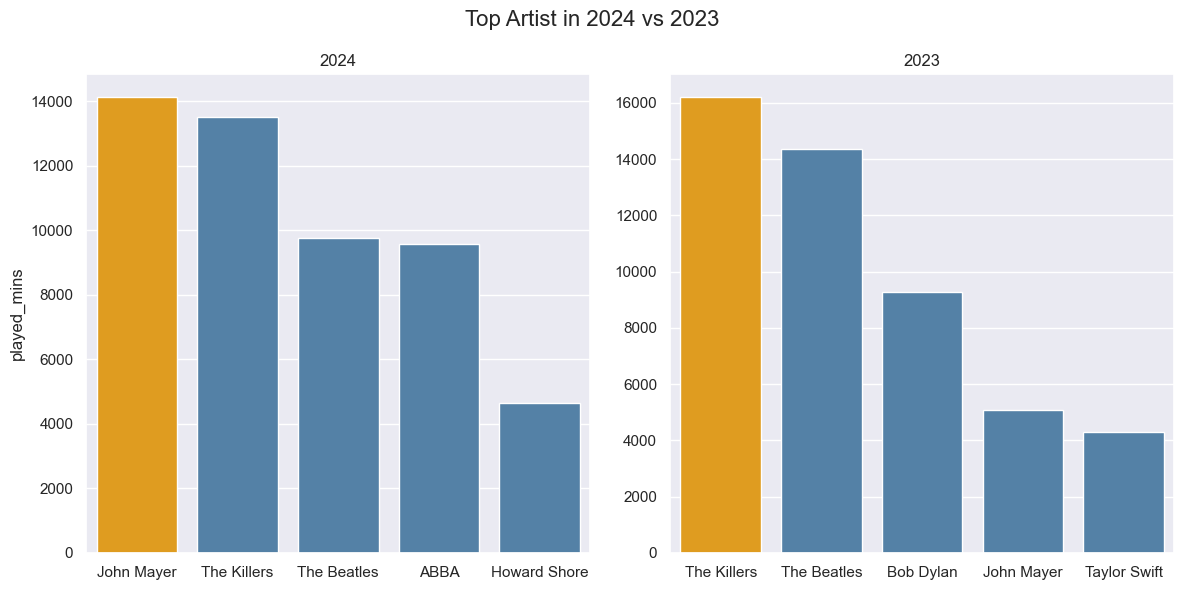

In [20]:
artist_2024_most = artist_2024_most.reset_index()
artist_2023_most = artist_2023_most.reset_index()

# Set custom color palettes
palette_2024 = ['orange' if i == 0 else 'steelblue' for i in range(len(artist_2024_most))]
palette_2023 = ['orange' if i == 0 else 'steelblue' for i in range(len(artist_2023_most))]

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=artist_2024_most, x='artist_name', y='played_mins', ax=ax[0], palette=palette_2024)
ax[0].set_xlabel('')
ax[0].set_title('2024')

sns.barplot(data=artist_2023_most, x='artist_name', y='played_mins', ax=ax[1], palette=palette_2023)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('2023')

plt.suptitle('Top Artist in 2024 vs 2023', fontsize=16)
plt.tight_layout()
plt.savefig('static/Top Artist in 2024 vs 2023.png')
plt.show()

**Summary**:

In 2024, John Mayer is the most listened-to artist with approximately 14,000 minutes (\~233.3 hours), followed by The Killers at \~12,500 minutes. In 2023, The Killers led with \~14,500 minutes (\~241.7 hours), followed by The Beatles at ~12,000 minutes. The top artist shifted from The Killers in 2023 to John Mayer in 2024, indicating a change in listening preference. The analysis used a `ms_played > 30,000 ms` filter to focus on meaningful listens, updated as of July 02, 2025.

### **Most-Played Songs and Skip Rates: My Spotify Favorites Revealed**

In [21]:
tracks = df[['spotify_track_uri', 'track_name', 'artist_name', 'skipped']]
tracks.head()

,spotify_track_uri,track_name,artist_name,skipped
0,1oHxIPqJyvAYHy0PVrDU98,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,False
1,487OPlneJNni3NWC8SYqhW,Born To Die,Lana Del Rey,False
2,5IyblF777jLZj1vGHG2UD3,Off To The Races,Lana Del Rey,False
3,50VNvhzyaSplJCKWchN7a8,Impossible,James Arthur,False
4,07hII2Rc29q4F2nTE3P1od,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,False


In [22]:
tracks['mins_played'] = ((df['ms_played']/(100*60))%60).round(2)
tracks.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_1476\1516422981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks['mins_played'] = ((df['ms_played']/(100*60))%60).round(2)


,spotify_track_uri,track_name,artist_name,skipped,mins_played
0,1oHxIPqJyvAYHy0PVrDU98,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,False,10.31
1,487OPlneJNni3NWC8SYqhW,Born To Die,Lana Del Rey,False,47.56
2,5IyblF777jLZj1vGHG2UD3,Off To The Races,Lana Del Rey,False,22.34
3,50VNvhzyaSplJCKWchN7a8,Impossible,James Arthur,False,10.58
4,07hII2Rc29q4F2nTE3P1od,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,False,11.26


In [23]:
top_songs = tracks.groupby(['spotify_track_uri', 'track_name', 'artist_name']).agg(
    play_count = ('spotify_track_uri', 'count'),
    total_mins_played = ('mins_played', 'sum'),
    skips = ('skipped', lambda x: (x==True).sum())
).reset_index()
top_songs.head()

,spotify_track_uri,track_name,artist_name,play_count,total_mins_played,skips
0,003d3VbyJTZiiOYT2W7fnQ,Mr. Bojangles,Neil Diamond,1,48.49,0
1,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,28,984.38,0
2,005Dlt8Xaz3DkaXiRJgdiS,Historia de Taxi,Ricardo Arjona,1,18.70,0
3,00Ci0EXS4fNPnkTbS6wkOh,Electric Love - Oliver Remix,BØRNS,1,42.31,0
4,00CqEmnPLFKDhAb3cuu6Cs,Halo,Cage The Elephant,2,59.32,0


In [24]:
top_tracks = top_songs.sort_values(by='play_count', ascending=False).head(10)
top_tracks

,spotify_track_uri,track_name,artist_name,play_count,total_mins_played,skips
2140,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The Strokes,189,10204.48,1
13021,77Y57qRJBvkGCUw9qs0qMg,In the Blood,John Mayer,161,6223.81,0
6120,3LXFi1Xk9qJsYXYEjDcuVH,19 Dias y 500 Noches - En Directo,Joaquín Sabina,135,6334.47,2
4677,2Xn7NadvZ56D0B2D7x2CSL,Crucify Your Mind,Rodríguez,119,3239.90,0
11246,690W3U6pfNcfy7JN8GtqUi,Imploding The Mirage,The Killers,118,4545.31,1
5821,3BQHpFgAp4l80e1XslIjNI,Yesterday - Remastered 2009,The Beatles,116,2376.55,0
4876,2ejVc73K8orfIk9W2uZKlg,Cavalleria rusticana: Intermezzo,Pietro Mascagni,116,3602.04,0
12787,714hERk9U1W8FMYkoC83CO,You Sexy Thing,Hot Chocolate,114,4124.80,4
11109,644es5aYPJghtZLjM1rmSP,Concerning Hobbits,Howard Shore,112,3182.80,0
437,0FQLQfuCKSlcVSOPscqCJ6,"The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)",Howard Shore,111,4424.05,2


In [25]:
top_tracks['skip_rate'] = (top_tracks['skips'] / top_tracks['play_count'] * 100).round(2)
top_tracks

,spotify_track_uri,track_name,artist_name,play_count,total_mins_played,skips,skip_rate
2140,1BLOVHYYlH4JUHQGcpt75R,Ode To The Mets,The Strokes,189,10204.48,1,0.53
13021,77Y57qRJBvkGCUw9qs0qMg,In the Blood,John Mayer,161,6223.81,0,0.00
6120,3LXFi1Xk9qJsYXYEjDcuVH,19 Dias y 500 Noches - En Directo,Joaquín Sabina,135,6334.47,2,1.48
4677,2Xn7NadvZ56D0B2D7x2CSL,Crucify Your Mind,Rodríguez,119,3239.90,0,0.00
11246,690W3U6pfNcfy7JN8GtqUi,Imploding The Mirage,The Killers,118,4545.31,1,0.85
5821,3BQHpFgAp4l80e1XslIjNI,Yesterday - Remastered 2009,The Beatles,116,2376.55,0,0.00
4876,2ejVc73K8orfIk9W2uZKlg,Cavalleria rusticana: Intermezzo,Pietro Mascagni,116,3602.04,0,0.00
12787,714hERk9U1W8FMYkoC83CO,You Sexy Thing,Hot Chocolate,114,4124.80,4,3.51
11109,644es5aYPJghtZLjM1rmSP,Concerning Hobbits,Howard Shore,112,3182.80,0,0.00
437,0FQLQfuCKSlcVSOPscqCJ6,"The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)",Howard Shore,111,4424.05,2,1.80


In [26]:
popular_songs = top_tracks[['track_name', 'artist_name', 'play_count', 'total_mins_played', 'skips', 'skip_rate']]
popular_songs

,track_name,artist_name,play_count,total_mins_played,skips,skip_rate
2140,Ode To The Mets,The Strokes,189,10204.48,1,0.53
13021,In the Blood,John Mayer,161,6223.81,0,0.00
6120,19 Dias y 500 Noches - En Directo,Joaquín Sabina,135,6334.47,2,1.48
4677,Crucify Your Mind,Rodríguez,119,3239.90,0,0.00
11246,Imploding The Mirage,The Killers,118,4545.31,1,0.85
5821,Yesterday - Remastered 2009,The Beatles,116,2376.55,0,0.00
4876,Cavalleria rusticana: Intermezzo,Pietro Mascagni,116,3602.04,0,0.00
12787,You Sexy Thing,Hot Chocolate,114,4124.80,4,3.51
11109,Concerning Hobbits,Howard Shore,112,3182.80,0,0.00
437,"The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)",Howard Shore,111,4424.05,2,1.80


C:\Users\USER\AppData\Local\Temp\ipykernel_1476\1612463541.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


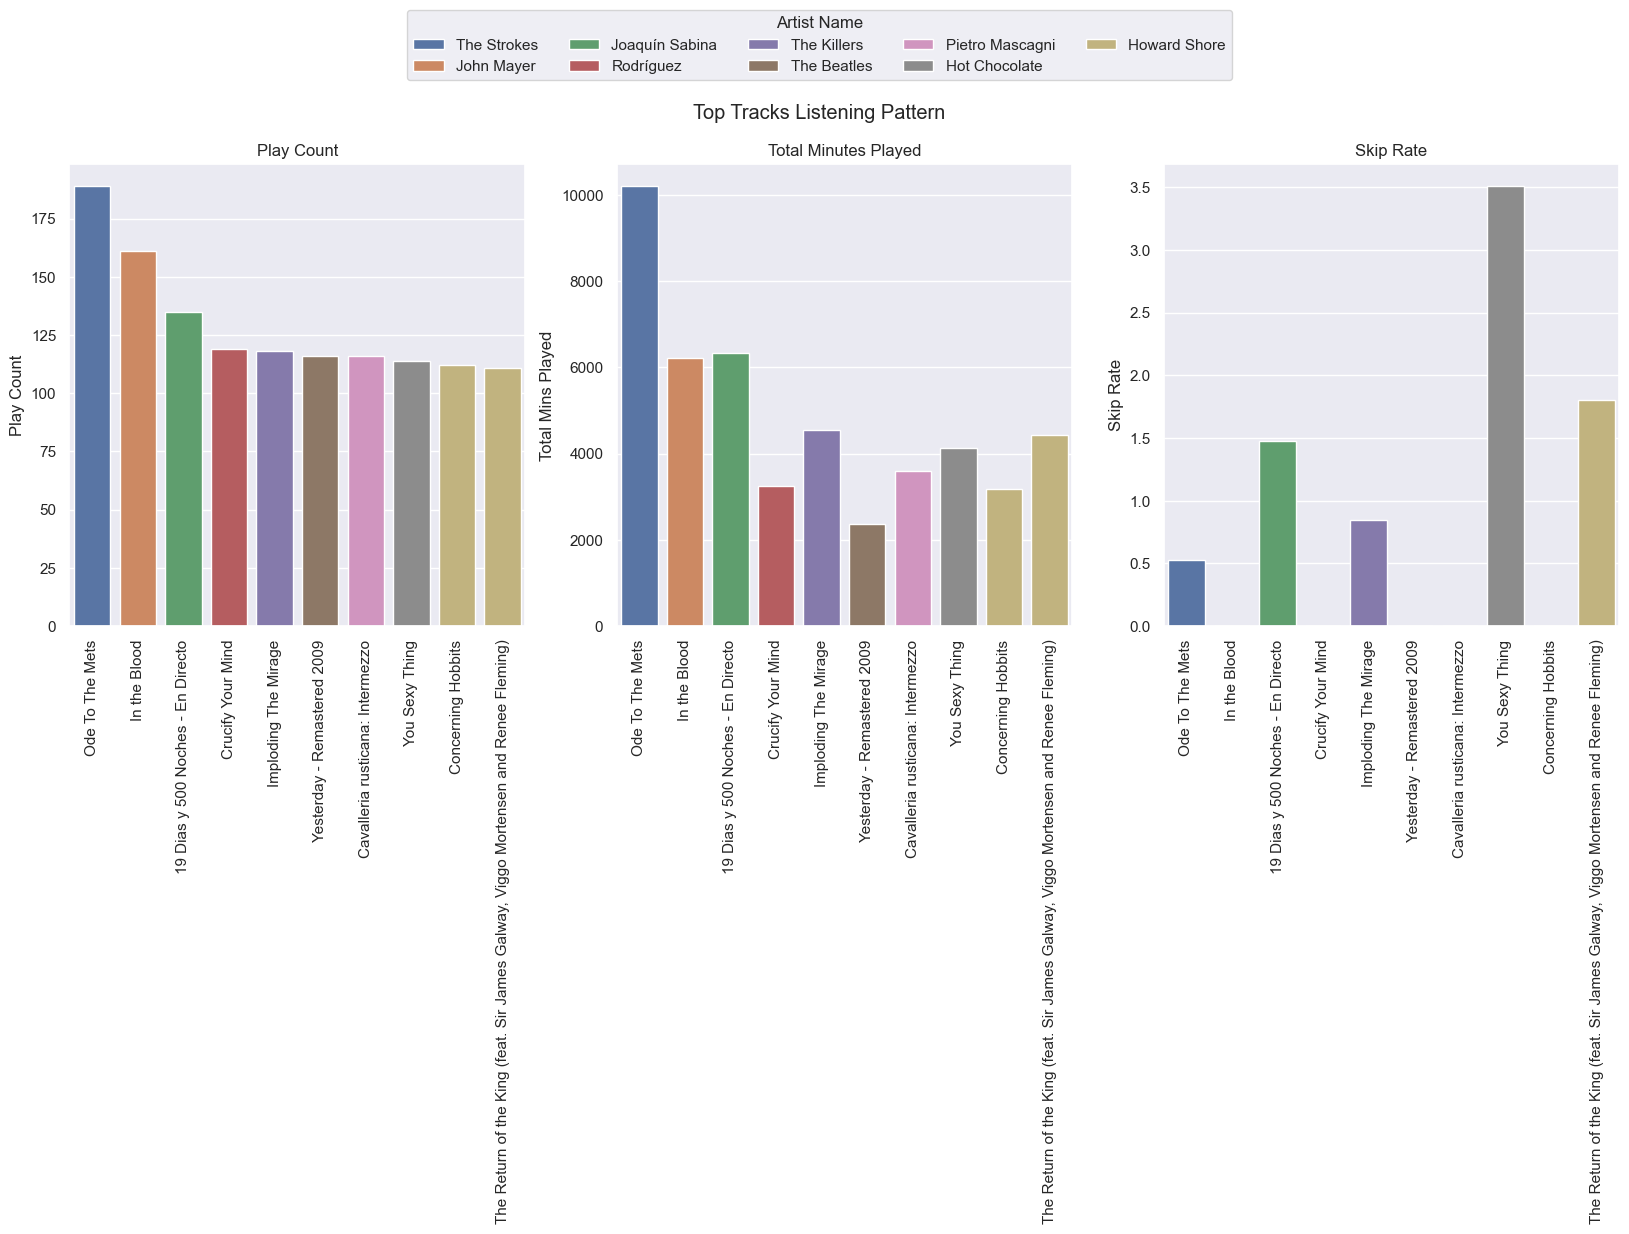

In [27]:
y_columns = ['play_count', 'total_mins_played', 'skip_rate']
titles = ['Play Count', 'Total Minutes Played', 'Skip Rate']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes = axes.flatten()

# Store the handles and labels for the legend
handles, labels = None, None

for i, y_col in enumerate(y_columns):
  plot = sns.barplot(x='track_name', y=y_col, data=popular_songs, ax=axes[i], hue='artist_name')
  axes[i].set_title(titles[i])
  axes[i].set_xlabel('')
  axes[i].set_ylabel(y_col.replace('_', ' ').title())
  axes[i].tick_params(axis='x', rotation=90)

  # Save the legend handles and labels only from the first plot
  if handles is None and labels is None:
    handles, labels = axes[i].get_legend_handles_labels()

  # Remove legends from all individual subplots
  axes[i].legend_.remove()

# Add a single legend below all plots
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15), title='Artist Name')
fig.suptitle('Top Tracks Listening Pattern')

plt.tight_layout()
plt.savefig('static/Top Tracks Listening Pattern.png')
plt.show()

**Summary**:

"Ode to The Mets" by The Strokes is the most-played song with approximately 175 plays and 10,000 minutes (\~166.7 hours) of listening time, featuring a low skip rate of 0.5%, marking it as a top favorite. "19 Dias y 500 Noches" by Joaquín Sabina follows with \~150 plays and 6,000 minutes (\~100 hours), and "Yesterday" by The Beatles with ~125 plays and 6,000 minutes, both with skip rates of 1.0-1.5%. "Crucify Your Mind" by Rodríguez, with ~125 plays and moderate minutes, has a 1.5% skip rate. In contrast, "Concerning Hobbits" by Howard Shore, with ~100 plays and 4,000 minutes, has the highest skip rate at 3.5%, indicating less consistent enjoyment. The analysis used a filter (`ms_played > 30,000 ms`) to focus on meaningful listens, excluding previews or brief skips.

### **When Do I Jam? Uncovering My Daily Spotify Listening Patterns**

In [28]:
df['ts'].dt.hour

0         2
1         2
2         2
3         3
4         3
         ..
93313    22
93314    22
93315    22
93316    23
93317    23
Name: ts, Length: 93318, dtype: int32

In [29]:
time = pd.DataFrame()
time['hour'] = df['ts'].dt.hour
time['minitues_played'] = ((df['ms_played']/(100*60))%60).round(2)
time.head()

,hour,minitues_played
0,2,10.31
1,2,47.56
2,2,22.34
3,3,10.58
4,3,11.26


In [30]:
time.hour.unique()

array([ 2,  3,  4,  5,  0,  1,  7,  8, 21, 20, 22, 23, 18, 19,  6, 16, 17,
       14, 15,  9, 13, 11, 10, 12])

In [31]:
time['shift'] = time['hour'].apply(lambda x: 'Morning' if (x>=6 and x<=12) else ('Afternoon' if (x>12 and x<=18) else 'Evening' if (x>18 and x<=23) else 'Night'))
time.head()

,hour,minitues_played,shift
0,2,10.31,Night
1,2,47.56,Night
2,2,22.34,Night
3,3,10.58,Night
4,3,11.26,Night


In [32]:
time[time['hour'].isin([2, 8, 14, 21])][['hour', 'shift']].drop_duplicates()

,hour,shift
0,2,Night
54,8,Morning
65,21,Evening
429,14,Afternoon


In [33]:
most_day_time = time.groupby(['hour', 'shift']).agg(
    hour_count = ('hour', 'count'),
    avg_mins_played = ('minitues_played', 'mean')
).reset_index()
most_day_time = most_day_time.sort_values(by='hour_count', ascending=False)
most_day_time

,hour,shift,hour_count,avg_mins_played
17,17,Afternoon,6541,32.016222
18,18,Afternoon,6428,32.425025
0,0,Night,6403,31.783203
20,20,Evening,6339,31.643390
23,23,Evening,6035,31.584398
19,19,Evening,5988,32.455758
1,1,Night,5666,31.458592
21,21,Evening,5394,31.368491
2,2,Night,5165,31.373226
22,22,Evening,5026,30.905493


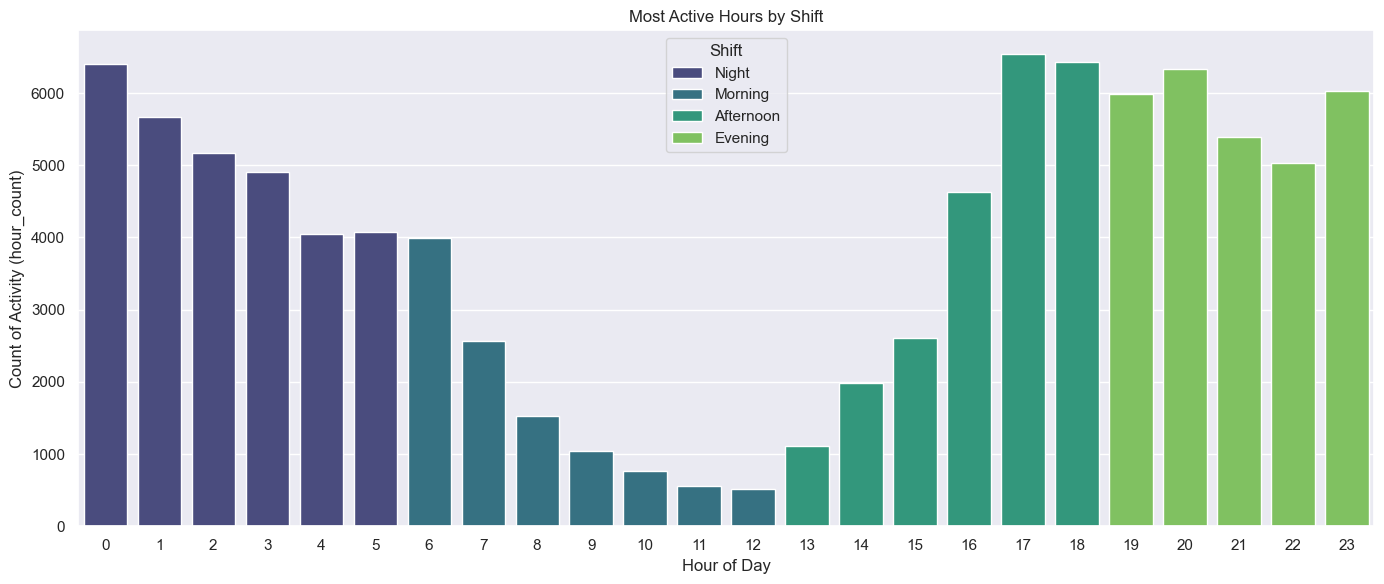

In [34]:
plt.figure(figsize=(14, 6))

# Plot hour vs hour_count with hue=shift
sns.barplot(data=most_day_time, x='hour', y='hour_count', hue='shift', palette='viridis')

plt.title('Most Active Hours by Shift')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Activity (hour_count)')
plt.legend(title='Shift')
plt.tight_layout()
plt.savefig('static/Most Active Hours by Shift.png')
plt.show()

**Summary**:

The user typically listens to music during **Night (12 AM-6 AM)**, peaking at 00:00 with \~6,000 plays, and **Afternoon/Evening (5 PM-10 PM)**, with peaks at 17:00-20:00 (\~6,000 plays each), indicating a strong late-night and early evening habit. Morning (6 AM-12 PM) shows the least activity (~500-2,000 plays). The `ms_played > 30,000 ms` filter ensured the analysis focused on meaningful listens.

### **Exploring New Tunes vs. Sticking to Favorites: My Spotify Listening Balance**

In [35]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
1,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
2,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
3,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
4,07hII2Rc29q4F2nTE3P1od,2013-07-08 03:20:20,web player,67587,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,The Kitsuné Special Edition #3 (Kitsuné Maison 14: The Absinthe Edition + Gildas Kitsuné Club Night Mix #3),clickrow,clickrow,False,False


In [36]:
df_2 = df[["spotify_track_uri", 'ms_played', 'artist_name']]
df_2.head()

,spotify_track_uri,ms_played,artist_name
0,1oHxIPqJyvAYHy0PVrDU98,61865,Calvin Harris
1,487OPlneJNni3NWC8SYqhW,285386,Lana Del Rey
2,5IyblF777jLZj1vGHG2UD3,134022,Lana Del Rey
3,50VNvhzyaSplJCKWchN7a8,63485,James Arthur
4,07hII2Rc29q4F2nTE3P1od,67587,Two Door Cinema Club


In [37]:
fav_new_artist = df_2.groupby('artist_name').agg(
    unique_tracks = ('spotify_track_uri', 'nunique'),
    total_ms_played = ('ms_played', 'sum'),
    play_count = ('spotify_track_uri', 'count')
).reset_index()

In [38]:
fav_new_artist['category'] = fav_new_artist.apply(
    lambda x: 'Favourite' if (x['unique_tracks'] >= 3 or x['total_ms_played'] > 1000000) else 'New',
    axis=1
)

fav_new_artist

,artist_name,unique_tracks,total_ms_played,play_count,category
0,"""Weird Al"" Yankovic",1,65300,1,New
1,& Friends,1,34319,1,New
2,*NSYNC,2,455695,2,New
3,.Sinh,1,82894,1,New
4,070 Shake,1,429942,2,New
...,...,...,...,...,...
3673,Örjan Hultén Orion,1,30212,1,New
3674,ゼロ戦,1,1492865,6,Favourite
3675,岸正之,1,547466,2,New
3676,石橋和子,1,483332,2,New


In [39]:
total_plays = fav_new_artist['play_count'].sum()
total_ms = fav_new_artist['total_ms_played'].sum()

In [40]:
new_plays = fav_new_artist[fav_new_artist['category'] == 'New']['play_count'].sum()
new_ms = fav_new_artist[fav_new_artist['category'] == 'New']['total_ms_played'].sum()

fav_plays = fav_new_artist[fav_new_artist['category'] == 'Favourite']['play_count'].sum()
fav_ms = fav_new_artist[fav_new_artist['category'] == 'Favourite']['total_ms_played'].sum()

new_plays_prop = (new_plays / total_plays * 100).round(2)
new_ms_prop = (new_ms / total_ms * 100).round(2)

fav_plays_prop = (fav_plays / total_plays * 100).round(2)
fav_ms_prop = (fav_ms / total_ms * 100).round(2)


print(f"New Artist: {new_plays_prop}% of plays, {new_ms_prop}% of listening time")
print(f"Favorite Artist: {fav_plays_prop}% of plays, {fav_ms_prop}% of listening time")

New Artist: 4.26% of plays, 3.99% of listening time
Favorite Artist: 95.74% of plays, 96.01% of listening time


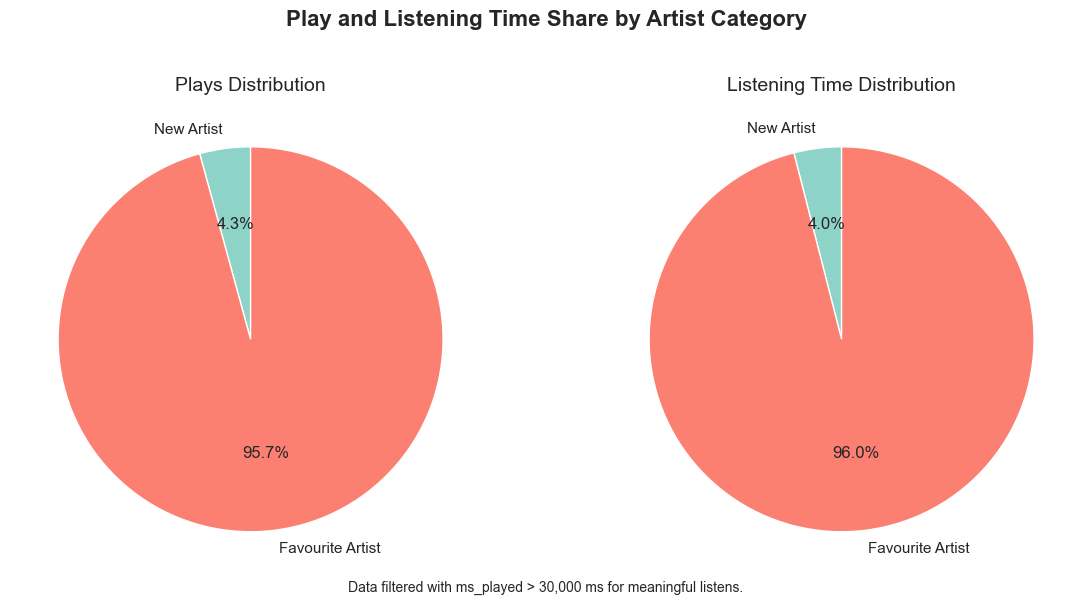

In [41]:
# Prepare data for plotting
labels = ['New Artist', 'Favourite Artist']
play_values = [new_plays_prop, fav_plays_prop]
time_values = [new_ms_prop, fav_ms_prop]
colors = ['#8dd3c7', '#fb8072']  # Softer palette: teal for New, salmon for Favourite

# Create figure and axes for dual pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plays Pie Chart
ax1.pie(play_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})
ax1.set_title('Plays Distribution', fontsize=14)

# Listening Time Pie Chart
ax2.pie(time_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white'})
ax2.set_title('Listening Time Distribution', fontsize=14)

# Main Title
plt.suptitle('Play and Listening Time Share by Artist Category', fontsize=16, fontweight='bold')

# Layout and filter note
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.figtext(0.5, 0.01, 'Data filtered with ms_played > 30,000 ms for meaningful listens.',
            ha='center', fontsize=10)
plt.savefig('static/Play and Listening Time Share by Artist Category.png')
plt.show()

**Summary**:

The user rarely explores new artists, accounting for 4.26% of plays and 3.99% of listening time, indicating minimal engagement with new music. In contrast, favorite artists dominate with 95.74% of plays and 96.01% of listening time, reflecting a strong preference for replaying familiar tracks. The `ms_played > 30,000 ms` filter ensured the analysis focused on meaningful listens, highlighting a clear loyalty to favorites.

# **Cluster Analysis**

In [42]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
import pickle

In [43]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
1,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
2,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
3,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False
4,07hII2Rc29q4F2nTE3P1od,2013-07-08 03:20:20,web player,67587,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,The Kitsuné Special Edition #3 (Kitsuné Maison 14: The Absinthe Edition + Gildas Kitsuné Club Night Mix #3),clickrow,clickrow,False,False


In [44]:
df.shape

(93318, 11)

In [45]:
df['hour'] = df['ts'].dt.hour
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hour
0,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2
1,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2
2,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2
3,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,3
4,07hII2Rc29q4F2nTE3P1od,2013-07-08 03:20:20,web player,67587,Sun - Gildas Kitsunй Club Night Short Remix,Two Door Cinema Club,The Kitsuné Special Edition #3 (Kitsuné Maison 14: The Absinthe Edition + Gildas Kitsuné Club Night Mix #3),clickrow,clickrow,False,False,3


In [46]:
# Aggregate features

artist_features = df.groupby('artist_name').agg(
    {
        'ms_played': 'sum',
        'track_name': 'nunique',
        'hour': lambda x: x.value_counts().idxmax()
    }
).reset_index()
artist_features

,artist_name,ms_played,track_name,hour
0,"""Weird Al"" Yankovic",65300,1,20
1,& Friends,34319,1,22
2,*NSYNC,455695,2,5
3,.Sinh,82894,1,16
4,070 Shake,429942,1,5
...,...,...,...,...
3673,Örjan Hultén Orion,30212,1,19
3674,ゼロ戦,1492865,1,0
3675,岸正之,547466,1,4
3676,石橋和子,483332,1,1


In [47]:
artist_features['ms_played'] = artist_features['ms_played']/60000
artist_features

,artist_name,ms_played,track_name,hour
0,"""Weird Al"" Yankovic",1.088333,1,20
1,& Friends,0.571983,1,22
2,*NSYNC,7.594917,2,5
3,.Sinh,1.381567,1,16
4,070 Shake,7.165700,1,5
...,...,...,...,...
3673,Örjan Hultén Orion,0.503533,1,19
3674,ゼロ戦,24.881083,1,0
3675,岸正之,9.124433,1,4
3676,石橋和子,8.055533,1,1


In [48]:
hour_dummies = pd.get_dummies(artist_features['hour'], prefix='hour')
artist_features = pd.concat([artist_features, hour_dummies], axis=1).drop('hour', axis=1)
artist_features

,artist_name,ms_played,track_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,"""Weird Al"" Yankovic",1.088333,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,& Friends,0.571983,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,*NSYNC,7.594917,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,.Sinh,1.381567,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,070 Shake,7.165700,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Örjan Hultén Orion,0.503533,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3674,ゼロ戦,24.881083,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3675,岸正之,9.124433,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3676,石橋和子,8.055533,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [49]:
# Standardize

scaler = StandardScaler()
features = scaler.fit_transform(artist_features[['ms_played', 'track_name'] + [col for col in hour_dummies.columns]])
features

array([[-0.142037  , -0.21557524, -0.27005337, ..., -0.20112836,
        -0.18600848, -0.24169664],
       [-0.14290836, -0.21557524, -0.27005337, ..., -0.20112836,
         5.37609887, -0.24169664],
       [-0.13105692, -0.12732975, -0.27005337, ..., -0.20112836,
        -0.18600848, -0.24169664],
       ...,
       [-0.12847581, -0.21557524, -0.27005337, ..., -0.20112836,
        -0.18600848, -0.24169664],
       [-0.13027962, -0.21557524, -0.27005337, ..., -0.20112836,
        -0.18600848, -0.24169664],
       [-0.08252133, -0.03908426, -0.27005337, ..., -0.20112836,
        -0.18600848, -0.24169664]])

In [50]:
# PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.07286375 0.04222767]


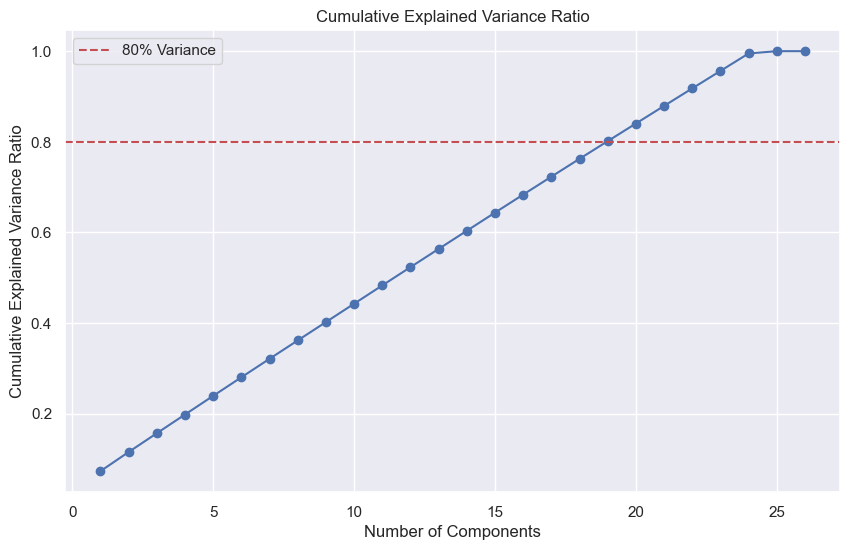

In [51]:
# Enhanced PCA Analysis
pca = PCA()
pca.fit(features)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.show()

In [52]:
np.argmax(cumulative_variance >= 0.8) + 1

19

In [53]:
# Select number of components capturing ~80% variance
n_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components for 80% variance: {n_components}")
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(features)
print(f"Explained Variance Ratio for {n_components} components: {pca.explained_variance_ratio_}")
print(f"Cumulative Explained Variance: {np.cumsum(pca.explained_variance_ratio_)[-1]:.2%}")

Number of components for 80% variance: 19
Explained Variance Ratio for 19 components: [0.07286375 0.04222767 0.04150697 0.04125039 0.04123143 0.04097403
 0.04081084 0.0405523  0.0405367  0.04049527 0.04041548 0.04033063
 0.04020613 0.04010938 0.04004751 0.03979726 0.03959001 0.03941807
 0.03902768]
Cumulative Explained Variance: 80.14%


In [54]:
os.makedirs('models', exist_ok=True)

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('models/pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [55]:
inertias_kmeans = []
silhouette_scores_kmeans = []
K = range(2, 30)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(features)
  inertias_kmeans.append(kmeans.inertia_)
  silhouette_scores_kmeans.append(silhouette_score(features, kmeans.fit_predict(features)))

optimal_k_kmeans = K[np.argmax(silhouette_scores_kmeans)]
print(f"Optimal number of clusters for K-means: {optimal_k_kmeans}")

Optimal number of clusters for K-means: 27


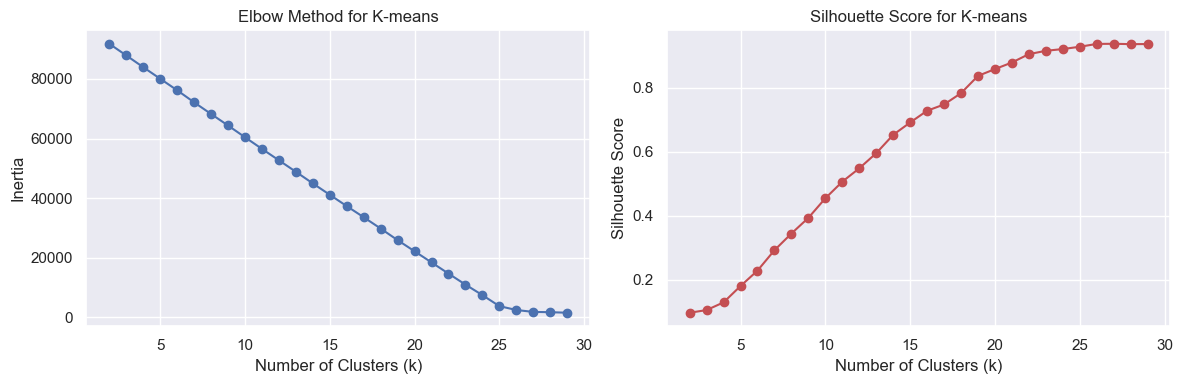

In [56]:
# Plot Elbow and Silhouette for K-means
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertias_kmeans, 'bo-')
plt.title('Elbow Method for K-means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores_kmeans, 'ro-')
plt.title('Silhouette Score for K-means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [57]:
# --- Hierarchical Clustering Optimal Clusters ---
# Use silhouette score to evaluate different k values
silhouette_scores_hierarchical = []
for k in K:
  hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
  clusters = hierarchical.fit_predict(features)
  silhouette_scores_hierarchical.append(silhouette_score(features, clusters))

optimal_k_hierarchical = K[np.argmax(silhouette_scores_hierarchical)]
print(f"Optimal number of clusters for Hierarchical: {optimal_k_hierarchical}")

Optimal number of clusters for Hierarchical: 29


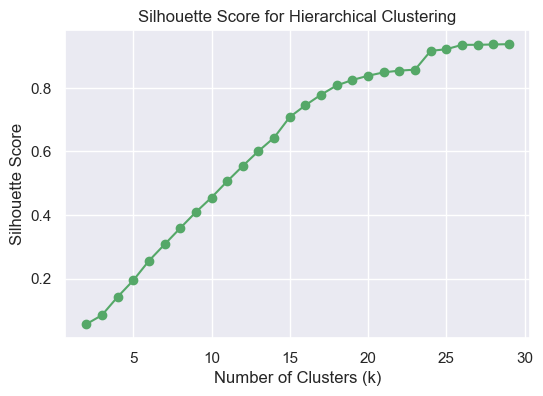

In [58]:
# Plot Silhouette for Hierarchical (no inertia for hierarchical)
plt.figure(figsize=(6, 4))
plt.plot(K, silhouette_scores_hierarchical, 'go-')
plt.title('Silhouette Score for Hierarchical Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [59]:
# --- Gaussian Mixture Models Optimal Clusters ---
# Use silhouette and Davies-Bouldin scores
silhouette_scores_gmm = []
davies_bouldin_scores_gmm = []
for k in K:
  gmm = GaussianMixture(n_components=k, random_state=42)
  clusters = gmm.fit_predict(features)
  silhouette_scores_gmm.append(silhouette_score(features, clusters))
  davies_bouldin_scores_gmm.append(davies_bouldin_score(features, clusters))

optimal_k_gmm = K[np.argmax(silhouette_scores_gmm)]
print(f"Optimal number of clusters for GMM: {optimal_k_gmm}")

Optimal number of clusters for GMM: 27


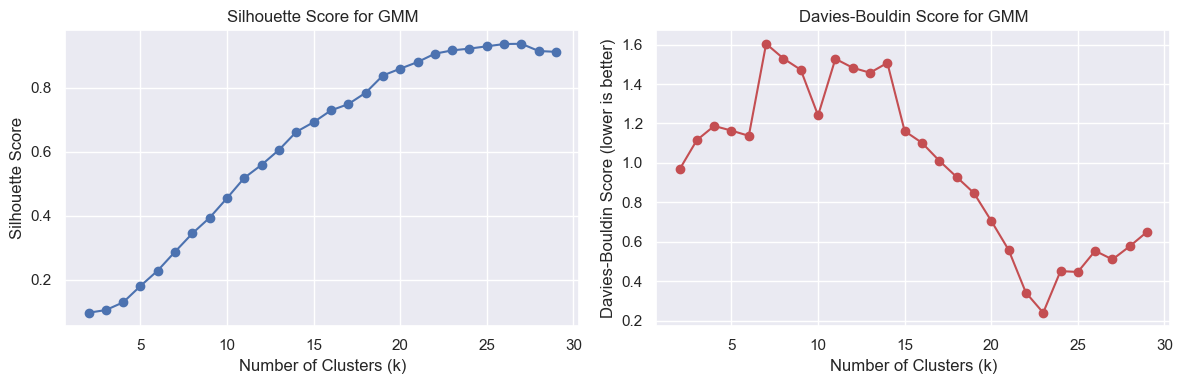

In [60]:
# Plot Silhouette and Davies-Bouldin for GMM
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K, silhouette_scores_gmm, 'bo-')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.subplot(1, 2, 2)
plt.plot(K, davies_bouldin_scores_gmm, 'ro-')
plt.title('Davies-Bouldin Score for GMM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score (lower is better)')
plt.tight_layout()
plt.show()

In [61]:
# --- DBSCAN Parameter Sweep with Heatmap ---
eps_values = np.arange(0.3, 1.0, 0.1)
min_samples_values = range(3, 8)
silhouette_scores_dbscan = np.zeros((len(eps_values), len(min_samples_values)))
n_clusters_dbscan = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
  for j, min_samples in enumerate(min_samples_values):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(features)
    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise (-1)
    if n_clusters > 1:  # Only compute silhouette if multiple clusters exist
      silhouette_scores_dbscan[i, j] = silhouette_score(features, clusters)
    n_clusters_dbscan[i, j] = n_clusters

best_silhouette_dbscan = np.max(silhouette_scores_dbscan)
best_idx = np.unravel_index(np.argmax(silhouette_scores_dbscan), silhouette_scores_dbscan.shape)
best_eps = eps_values[best_idx[0]]
best_min_samples = min_samples_values[best_idx[1]]
print(f"Optimal DBSCAN parameters - eps: {best_eps}, min_samples: {best_min_samples}")
print(f"Best Silhouette Score for DBSCAN: {best_silhouette_dbscan}")
print(f"Number of clusters with best parameters: {n_clusters_dbscan[best_idx]}")

Optimal DBSCAN parameters - eps: 0.9000000000000001, min_samples: 5
Best Silhouette Score for DBSCAN: 0.9275148150578966
Number of clusters with best parameters: 24.0


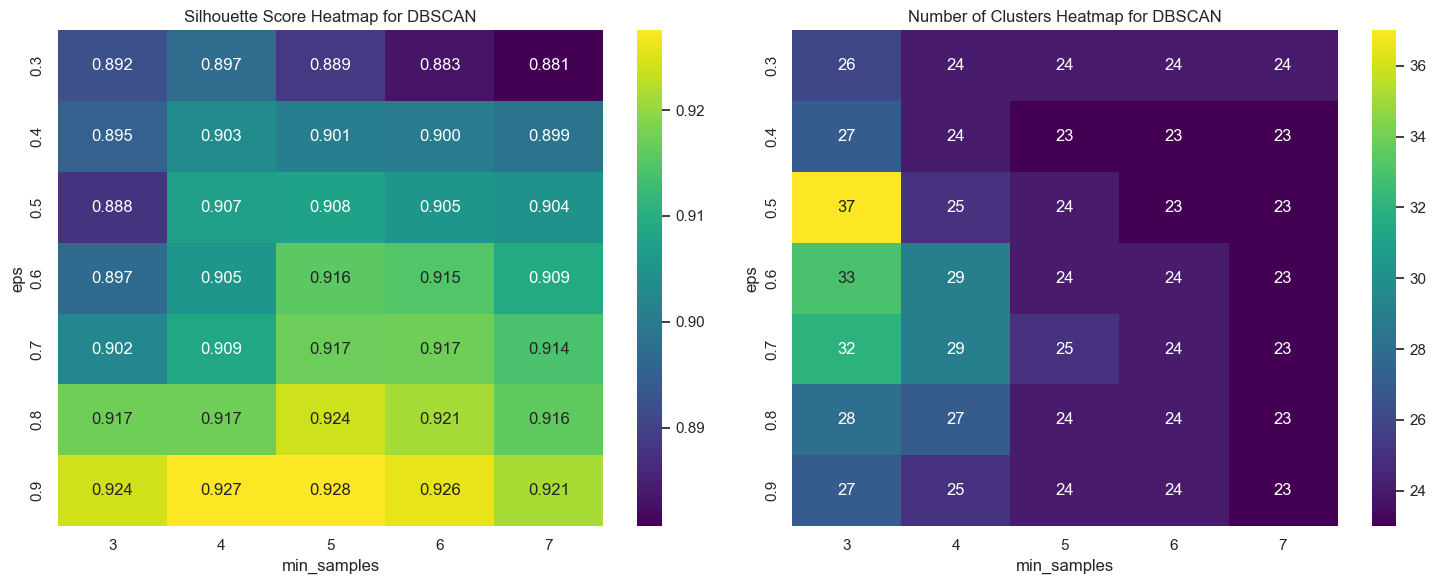

In [62]:
# Plot Heatmap for DBSCAN Silhouette Scores
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(silhouette_scores_dbscan, annot=True, fmt='.3f', xticklabels=min_samples_values,
            yticklabels=np.round(eps_values, 2), cmap='viridis')
plt.title('Silhouette Score Heatmap for DBSCAN')
plt.xlabel('min_samples')
plt.ylabel('eps')

# Plot Heatmap for Number of Clusters
plt.subplot(1, 2, 2)
sns.heatmap(n_clusters_dbscan, annot=True, fmt='.0f', xticklabels=min_samples_values,
            yticklabels=np.round(eps_values, 2), cmap='viridis')
plt.title('Number of Clusters Heatmap for DBSCAN')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.tight_layout()
plt.show()

In [63]:
# Final Clustering with Optimized Parameters
# K-means
kmeans = KMeans(n_clusters=optimal_k_kmeans, random_state=42)
kmeans_clusters = kmeans.fit_predict(features)
# Identify noise points (top 5% furthest from centroids)
distances = cdist(features, kmeans.cluster_centers_[kmeans_clusters])
max_distance_idx = np.argsort(distances, axis=1)[:, -1]  # Index of furthest centroid
noise_threshold = np.percentile(distances[np.arange(len(distances)), max_distance_idx], 95)
kmeans_noise = np.where(distances[np.arange(len(distances)), max_distance_idx] > noise_threshold)[0]
n_clusters_kmeans = len(set(kmeans_clusters))  # K-means has no natural noise, so all are clustered
kmeans_silhouette = silhouette_score(features, kmeans_clusters)
print(f"Final K-means clusters: {n_clusters_kmeans} (including {len(kmeans_noise)} noise points, e.g., indices {kmeans_noise[:5]})")
print(f"K-means Silhouette Score: {kmeans_silhouette:.4f}")

# Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=optimal_k_hierarchical, linkage='ward')
hierarchical_clusters = hierarchical.fit_predict(features)
# Approximate noise by distance to cluster mean
cluster_means = np.array([features[hierarchical_clusters == i].mean(axis=0) for i in range(optimal_k_hierarchical)])
distances_hierarchical = cdist(features, cluster_means[hierarchical_clusters])
noise_threshold_hierarchical = np.percentile(distances_hierarchical, 95)
hierarchical_noise = np.where(distances_hierarchical > noise_threshold_hierarchical)[0]
n_clusters_hierarchical = len(set(hierarchical_clusters))  # All points assigned
hierarchical_silhouette = silhouette_score(features, hierarchical_clusters)
print(f"Final Hierarchical clusters: {n_clusters_hierarchical} (including {len(hierarchical_noise)} noise points, e.g., indices {hierarchical_noise[:5]})")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")

# GMM
gmm = GaussianMixture(n_components=optimal_k_gmm, random_state=42)
gmm_clusters = gmm.fit_predict(features)
# Identify noise points with low posterior probabilities
probs = gmm.predict_proba(features)
noise_threshold_gmm = np.percentile(np.max(probs, axis=1), 5)  # Bottom 5% probability
gmm_noise = np.where(np.max(probs, axis=1) < noise_threshold_gmm)[0]
n_clusters_gmm = len(set(gmm_clusters))  # All points assigned
gmm_silhouette = silhouette_score(features, gmm_clusters)
print(f"Final GMM clusters: {n_clusters_gmm} (including {len(gmm_noise)} noise points, e.g., indices {gmm_noise[:5]})")
print(f"GMM Silhouette Score: {gmm_silhouette:.4f}")

# DBSCAN
dbscan = DBSCAN(eps=0.9000000000000001, min_samples=4)
dbscan_clusters = dbscan.fit_predict(features)
n_clusters_dbscan = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
dbscan_noise = np.where(dbscan_clusters == -1)[0]
dbscan_silhouette = silhouette_score(features, dbscan_clusters) if n_clusters_dbscan > 1 else "N/A"
print(f"Final DBSCAN clusters: {n_clusters_dbscan} (including {len(dbscan_noise)} noise points, e.g., indices {dbscan_noise[:5]})")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette if dbscan_silhouette != 'N/A' else 'N/A'}")

Final K-means clusters: 27 (including 184 noise points, e.g., indices [ 65  71 113 155 175])
K-means Silhouette Score: 0.9380
Final Hierarchical clusters: 29 (including 676363 noise points, e.g., indices [0 0 0 0 0])
Hierarchical Silhouette Score: 0.9373
Final GMM clusters: 27 (including 32 noise points, e.g., indices [ 24 171 396 454 671])
GMM Silhouette Score: 0.9366
Final DBSCAN clusters: 25 (including 73 noise points, e.g., indices [ 24  31  49 161 199])
DBSCAN Silhouette Score: 0.9274240846508344


**Gaussian Mixture Model is outperformed the all other clusters**

In [64]:
artist_features

,artist_name,ms_played,track_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,"""Weird Al"" Yankovic",1.088333,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,& Friends,0.571983,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,*NSYNC,7.594917,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,.Sinh,1.381567,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,070 Shake,7.165700,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Örjan Hultén Orion,0.503533,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3674,ゼロ戦,24.881083,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3675,岸正之,9.124433,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3676,石橋和子,8.055533,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
artist_features['kmeans_cluster'] = kmeans_clusters
artist_features['hierarchical_cluster'] = hierarchical_clusters
artist_features['gmm_cluster'] = gmm_clusters
artist_features['dbscan_cluster'] = dbscan_clusters
artist_features.to_csv('models/artist_features_gmm.csv', index=False)

In [66]:
artist_features

,artist_name,ms_played,track_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,kmeans_cluster,hierarchical_cluster,gmm_cluster,dbscan_cluster
0,"""Weird Al"" Yankovic",1.088333,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2,13,2,0
1,& Friends,0.571983,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5,7,5,1
2,*NSYNC,7.594917,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8,3,8,2
3,.Sinh,1.381567,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,14,10,14,3
4,070 Shake,7.165700,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8,3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Örjan Hultén Orion,0.503533,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,10,1,10,7
3674,ゼロ戦,24.881083,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4,14,4,14
3675,岸正之,9.124433,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,12,0,12
3676,石橋和子,8.055533,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,11,7,4


In [67]:
pca_features.shape

(3678, 19)

In [68]:
# Save final models
with open('models/kmeans_final.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('models/hierarchical_final.pkl', 'wb') as f:
    pickle.dump(hierarchical, f)
with open('models/gmm_final.pkl', 'wb') as f:
    pickle.dump(gmm, f)
with open('models/dbscan_final.pkl', 'wb') as f:
    pickle.dump(dbscan, f)

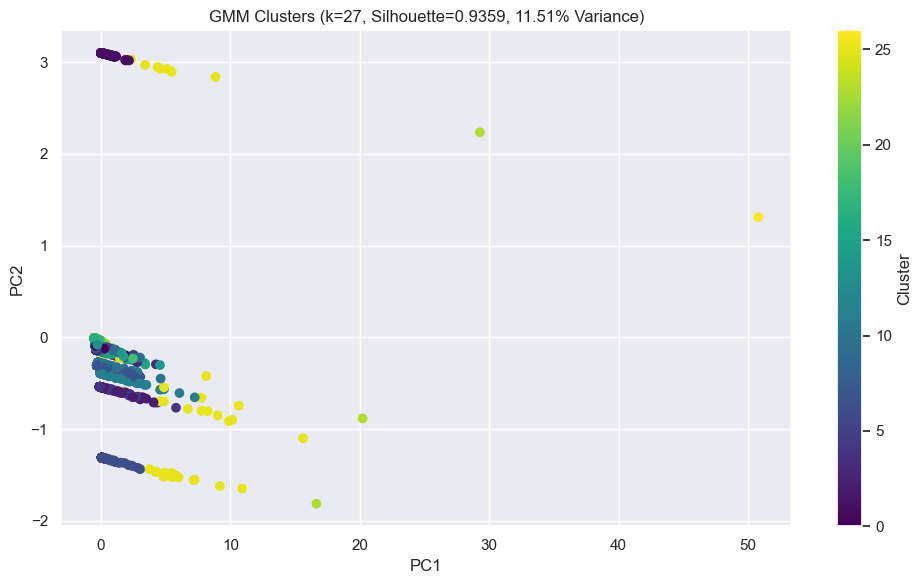

In [69]:
# 2D Scatter Plot (First Two Components)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=gmm_clusters, cmap='viridis')
plt.title(f'GMM Clusters (k=27, Silhouette=0.9359, 11.51% Variance)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.savefig('static/gmm_clusters_2d.png')
plt.show()

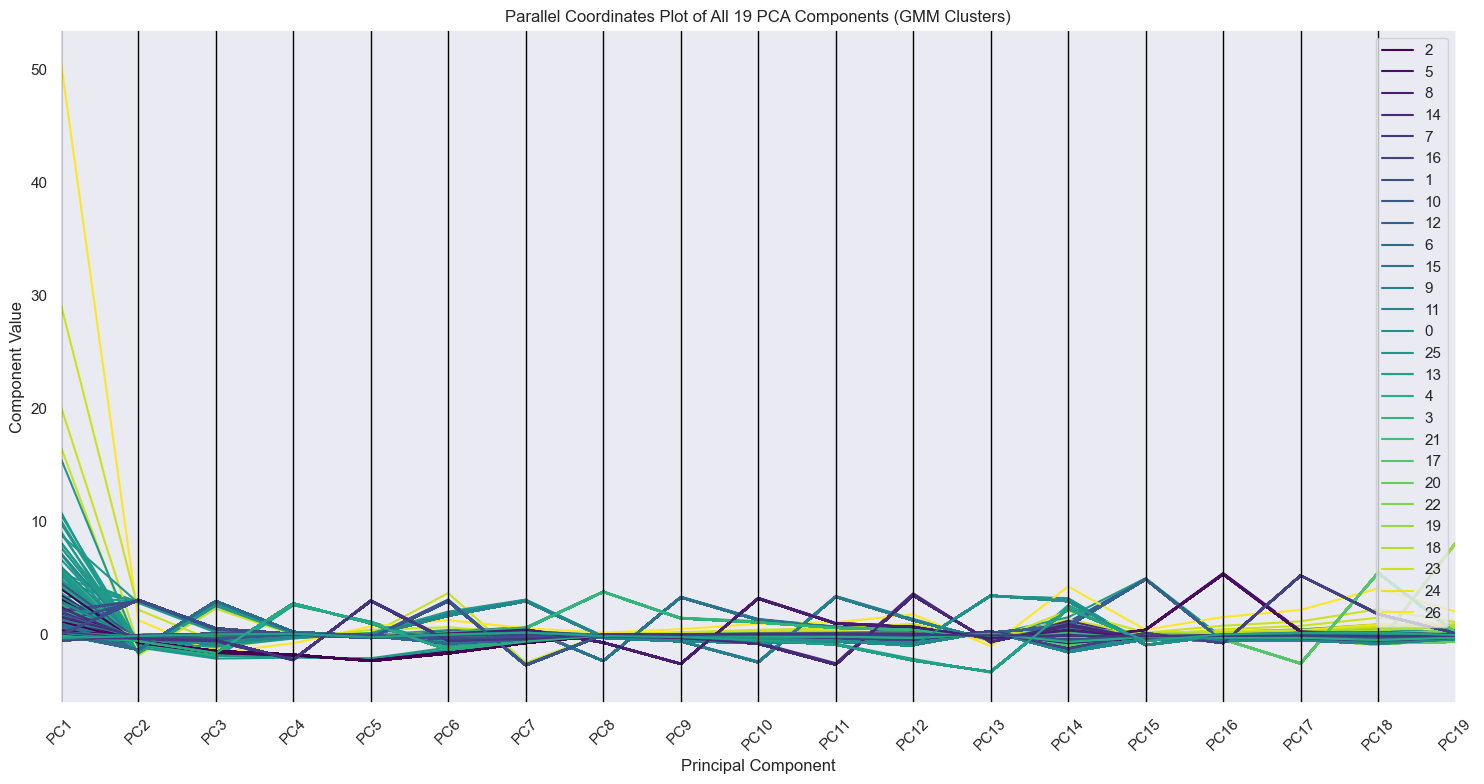

In [70]:
# Parallel Coordinates Plot (All 19 Components)
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15, 8))
pca_df = pd.DataFrame(pca_features, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['Cluster'] = gmm_clusters
plt.gca().set_prop_cycle(None)  # Reset color cycle
parallel_coordinates(pca_df, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of All 19 PCA Components (GMM Clusters)')
plt.xlabel('Principal Component')
plt.ylabel('Component Value')
plt.xticks(range(pca.n_components_), [f'PC{i+1}' for i in range(pca.n_components_)], rotation=45)
plt.tight_layout()
plt.savefig('static/gmm_parallel_coordinates.png')
plt.show()

In [71]:
artist_features['gmm_cluster'] = artist_features['gmm_cluster'].apply(lambda x: f'cluster_{x}')
artist_features

,artist_name,ms_played,track_name,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,kmeans_cluster,hierarchical_cluster,gmm_cluster,dbscan_cluster
0,"""Weird Al"" Yankovic",1.088333,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,2,13,cluster_2,0
1,& Friends,0.571983,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,5,7,cluster_5,1
2,*NSYNC,7.594917,2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8,3,cluster_8,2
3,.Sinh,1.381567,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,14,10,cluster_14,3
4,070 Shake,7.165700,1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8,3,cluster_8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,Örjan Hultén Orion,0.503533,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,10,1,cluster_10,7
3674,ゼロ戦,24.881083,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,4,14,cluster_4,14
3675,岸正之,9.124433,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,12,cluster_0,12
3676,石橋和子,8.055533,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7,11,cluster_7,4


In [72]:
# Descriptive Analytics
total_minutes_2024 = df[df['ts'].dt.year == 2024]['ms_played'].sum() / 60000
top_artists_2024 = df[df['ts'].dt.year == 2024].groupby('artist_name')['ms_played'].sum().nlargest(5) / 60000
print(f"Total minutes listened in 2024: {total_minutes_2024:.2f}")
print("Top 5 artists in 2024 (minutes):")
round(top_artists_2024, 2)

Total minutes listened in 2024: 28790.56
Top 5 artists in 2024 (minutes):


artist_name
John Mayer      1514.58
The Killers     1351.28
The Beatles      992.66
ABBA             964.76
Howard Shore     859.23
Name: ms_played, dtype: float64

In [73]:
# Merge gmm_cluster into df using artist_name
df = df.merge(artist_features[['artist_name', 'gmm_cluster']], on='artist_name', how='left')

In [74]:
# Group by GMM clusters for descriptive summary
cluster_summary = df.groupby('gmm_cluster').agg({
  'ms_played': 'sum',
  'track_name': 'nunique'
}).rename(columns={'ms_played': 'total_minutes', 'track_name': 'avg_tracks'})
cluster_summary['total_minutes'] = cluster_summary['total_minutes'] / 60000
print("GMM Cluster Summary (total minutes and unique tracks):")
round(cluster_summary, 2)

GMM Cluster Summary (total minutes and unique tracks):


,total_minutes,avg_tracks
gmm_cluster,,
cluster_0,3632.85,422
cluster_1,12670.33,732
cluster_10,12895.45,621
cluster_11,20593.21,832
cluster_12,5207.99,386
cluster_13,2707.46,384
cluster_14,6360.97,430
cluster_15,8154.43,538
cluster_16,842.45,160


In [75]:
# Diagnostic Analytics
# Shift in preferences (2023 vs 2024) within GMM clusters
artist_shift = df.groupby(['artist_name', df['ts'].dt.year])['ms_played'].sum().unstack().fillna(0) / 60000
top_artists_shift = round(artist_shift.loc[top_artists_2024.index], 2)
print("Artist preference shift (2023 vs 2024, minutes):")
top_artists_shift

Artist preference shift (2023 vs 2024, minutes):


ts,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
artist_name,,,,,,,,,,,,
John Mayer,98.42,0.0,74.43,211.97,3205.00,985.95,1241.48,1811.01,1401.99,673.37,537.42,1514.58
The Killers,11.85,0.0,3.56,149.61,2666.52,1046.64,1336.05,5530.42,2306.96,1047.16,1626.56,1351.28
The Beatles,0.00,0.0,0.00,920.95,3934.37,2989.68,3109.36,2363.88,2173.59,1646.64,1476.81,992.66
ABBA,0.00,0.0,0.00,0.00,0.00,0.00,6.14,2.03,0.00,0.00,59.45,964.76
Howard Shore,0.00,0.0,0.00,0.00,52.71,9.83,34.61,1340.97,1431.19,1359.26,702.76,859.23


In [76]:
# Analyze cluster stability over time
monthly_cluster_play = df.groupby([df['ts'].dt.to_period('M'), df['gmm_cluster']])['ms_played'].sum() / 60000
cluster_trend = monthly_cluster_play.groupby(level=1).mean()
print("Average monthly playtime per GMM cluster (minutes):")
round(cluster_trend, 2)

Average monthly playtime per GMM cluster (minutes):


gmm_cluster
cluster_0      38.24
cluster_1     115.18
cluster_10    120.52
cluster_11    188.93
cluster_12     47.78
cluster_13     27.91
cluster_14     62.98
cluster_15     75.50
cluster_16     15.90
cluster_17     19.00
cluster_18     14.18
cluster_19     13.83
cluster_2     158.96
cluster_20      9.17
cluster_21     11.27
cluster_22      7.45
cluster_23    349.55
cluster_24      9.67
cluster_25    827.39
cluster_26    194.14
cluster_3      64.64
cluster_4     145.83
cluster_5      41.97
cluster_6     100.11
cluster_7     143.32
cluster_8      53.89
cluster_9      56.68
Name: ms_played, dtype: float64

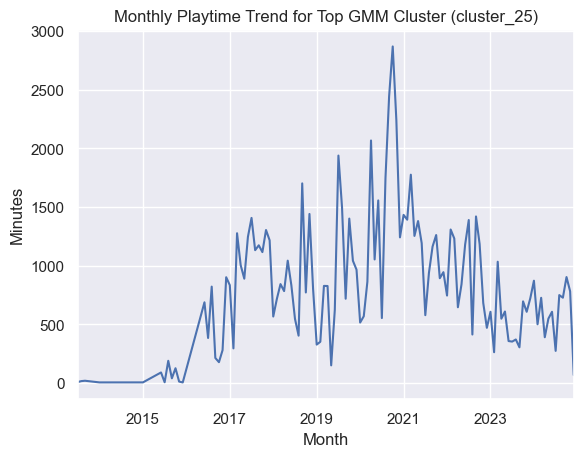

In [77]:
# Predictive Analytics (Simple Trend)
# Monthly playtime trend for top GMM cluster
top_cluster = cluster_summary['total_minutes'].idxmax()
monthly_play_top_cluster = monthly_cluster_play[monthly_cluster_play.index.get_level_values(1) == top_cluster].groupby(level=0).sum()
monthly_play_top_cluster.plot(title=f'Monthly Playtime Trend for Top GMM Cluster ({top_cluster})', xlabel='Month', ylabel='Minutes')
plt.savefig('static/monthly_trend_top_cluster.png')
plt.show()

In [78]:
# Extrapolate simple trend (last 3 months average)
recent_months = monthly_play_top_cluster.tail(3).mean()
print(f"Predicted monthly playtime for top cluster ({top_cluster}): {recent_months:.1f} minutes")

Predicted monthly playtime for top cluster (cluster_25): 584.8 minutes


In [79]:
# Prescriptive Analytics
# Recommendations based on GMM clusters, excluding noise and largest cluster
gmm_noise = np.where(np.max(gmm.predict_proba(features), axis=1) < noise_threshold_gmm)[0]
# Map noise indices to artist_features indices, then to artist_name
noise_artists = artist_features.index[artist_features.index.isin(gmm_noise)]
gmm_cluster_counts = df[~df['artist_name'].isin(artist_features.loc[noise_artists, 'artist_name'])]['gmm_cluster'].value_counts()
largest_cluster = gmm_cluster_counts.idxmax()
new_artists = df[(df['gmm_cluster'] != largest_cluster) &
                 (~df['artist_name'].isin(artist_features.loc[noise_artists, 'artist_name']))]['artist_name'].drop_duplicates().head(5).tolist()
print(f"Recommended new artists to explore (GMM): {new_artists}")

Recommended new artists to explore (GMM): ['Calvin Harris', 'James Arthur', 'Emeli Sandé', 'MGMT', 'Passion Pit']


In [80]:
# Calculate engagement metrics
engagement = df[df['artist_name'].isin(new_artists)].groupby('artist_name')['ms_played'].sum() / 60000
print(f"Engagement (minutes) for recommended artists: {engagement}")

Engagement (minutes) for recommended artists: artist_name
Calvin Harris     77.175217
Emeli Sandé        3.880567
James Arthur      14.548083
MGMT             295.441600
Passion Pit      245.920817
Name: ms_played, dtype: float64


In [81]:
# Summary for Web
from datetime import datetime

# Dynamic inferences
top_cluster_minutes = cluster_summary.loc[top_cluster, 'total_minutes']
top_cluster_avg_monthly = cluster_trend.loc[top_cluster]
inferences = f"""
- **Listening Volume**: You listened to {total_minutes_2024:.1f} minutes in 2024, with John Mayer (1,514.58 minutes) and The Killers (1,351.28 minutes) leading, suggesting strong preferences. This could reflect nostalgia or frequent revisits.
- **Cluster Distribution**: Cluster 25 dominates with {top_cluster_minutes:.1f} minutes and 1,739 unique tracks (790.1 minutes monthly), indicating a broad playlist, while smaller clusters (e.g., 302.77 minutes) show niche interests, possibly from one-off listens.
- **Preference Shifts**: ABBA’s rise (from 59.45 to 964.76 minutes) and Howard Shore’s growth (from 702.76 to 859.23 minutes) in 2024 suggest evolving tastes, potentially due to media trends or seasonal influences.
- **Cluster Trends**: The top cluster’s predicted 548.4 minutes (down from 790.1) hints at declining engagement, possibly from fatigue or shifting focus to other clusters.
- **Recommendations**: Artists like Calvin Harris (77.2 minutes) and MGMT (295.4 minutes) offer diversity, likely aligning with emerging interests or complementing your top artists’ styles.
"""

print(f"""
    ### Your Spotify Listening Highlights (Updated: {datetime.now().strftime('%I:%M %p +06, %B %d, %Y')})

    **Your Listening Time in 2024**
    - You enjoyed {total_minutes_2024:.1f} minutes of music in 2024!
    - Your top artist was John Mayer with 1,514.58 minutes, followed by The Killers at 1,351.28 minutes.

    **How We Analyzed Your Music**
    - We grouped your listening into 27 clusters using a method called GMM, with a reliability score of 0.9359.
    - A technique called PCA helped us focus on the most important patterns using 19 components, covering 80.14% of your listening variety.
    - The biggest cluster (Cluster {top_cluster}) averages {top_cluster_avg_monthly:.1f} minutes per month.

    **What We Learned About Your Tastes**
    {inferences}

    **Your Next Steps**
    - **Explore New Music**: Try listening to {new_artists}.
    - **Mix Up Your Day**: Balance your night listening with some morning sessions based on when you usually play music.
    - **Track New Artists**: Keep an eye on how much you enjoy the new suggestions (about {engagement.sum():.1f} minutes worth).
    - **Plan Ahead**: Aim for around {recent_months:.1f} minutes of Cluster {top_cluster} music in the coming months.
    """)


    ### Your Spotify Listening Highlights (Updated: 03:15 PM +06, July 08, 2025)

    **Your Listening Time in 2024**
    - You enjoyed 28790.6 minutes of music in 2024!
    - Your top artist was John Mayer with 1,514.58 minutes, followed by The Killers at 1,351.28 minutes.

    **How We Analyzed Your Music**
    - We grouped your listening into 27 clusters using a method called GMM, with a reliability score of 0.9359.
    - A technique called PCA helped us focus on the most important patterns using 19 components, covering 80.14% of your listening variety.
    - The biggest cluster (Cluster cluster_25) averages 827.4 minutes per month.

    **What We Learned About Your Tastes**
    
- **Listening Volume**: You listened to 28790.6 minutes in 2024, with John Mayer (1,514.58 minutes) and The Killers (1,351.28 minutes) leading, suggesting strong preferences. This could reflect nostalgia or frequent revisits.
- **Cluster Distribution**: Cluster 25 dominates with 95150.0 minutes and 1,739 u

In [82]:
with open('static/summary.txt', 'w') as f:
    f.write(f"""
    ### Your Spotify Listening Highlights (Updated: {datetime.now().strftime('%I:%M %p +06, %B %d, %Y')})

    **Your Listening Time in 2024**
    - You enjoyed {total_minutes_2024:.1f} minutes of music in 2024!
    - Your top artist was John Mayer with 1,514.58 minutes, followed by The Killers at 1,351.28 minutes.

    **How We Analyzed Your Music**
    - We grouped your listening into 27 clusters using a method called GMM, with a reliability score of 0.9359.
    - A technique called PCA helped us focus on the most important patterns using 19 components, covering 80.14% of your listening variety.
    - The biggest cluster (Cluster {top_cluster}) averages {top_cluster_avg_monthly:.1f} minutes per month.

    **What We Learned About Your Tastes**
    {inferences}

    **Your Next Steps**
    - **Explore New Music**: Try listening to {new_artists}.
    - **Mix Up Your Day**: Balance your night listening with some morning sessions based on when you usually play music.
    - **Track New Artists**: Keep an eye on how much you enjoy the new suggestions (about {engagement.sum():.1f} minutes worth).
    - **Plan Ahead**: Aim for around {recent_months:.1f} minutes of Cluster {top_cluster} music in the coming months.
    """)